[스트링](https://www.youtube.com/watch?v=uQDkTytdD7w&list=PLXziV1DL41ojhfghjtP_jrU03iYy0vJZe&index=8)

In [10]:
import numpy as np

n = 10
p = 0.5

for i in range(n):
    if np.random.uniform(0., 1.) > 1-p: 
        print("H")
    else:
        print("T")

T
H
H
H
T
H
T
T
H
T


[리스트 어펜드 메쏘드](https://www.youtube.com/watch?v=gMWlU58jxmw&list=PLXziV1DL41ojhfghjtP_jrU03iYy0vJZe&index=22&t=0s)

In [1]:
import numpy as np

n = 10
p = 0.5

coin = []
for i in range(n):
    if np.random.uniform(0., 1.) > 1 - p:
        coin.append("H")
    else:
        coin.append("T")
        
print(coin)

['H', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'H', 'T']


[벡터리제이션](https://www.youtube.com/watch?v=udDod-Q1akg&list=PLXziV1DL41oj_WtNSq41Jm4msNZ9VO6H8&index=17&t=2s)

In [2]:
import numpy as np

n = 10
p = 0.5

uniform_sample = np.random.uniform(0., 1., (n,))
coin = np.zeros_like(uniform_sample)
coin[uniform_sample > 1-p] = 1.

print(coin)

[1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]


Strong Law of Large Numbers

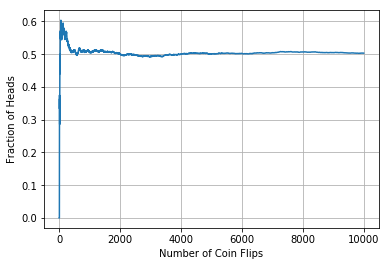

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
p = 0.5

uniform_sample = np.random.uniform(0., 1., (n,))
coin = np.zeros_like(uniform_sample)
coin[uniform_sample > 1-p] = 1.
running_average = np.cumsum(coin) / np.arange(1,n+1)

plt.plot(np.arange(1,n+1), running_average)
plt.xlabel('Number of Coin Flips')
plt.ylabel('Fraction of Heads')
plt.grid(True)
plt.show()

Weak Law of Large Numbers

In [7]:
# https://matplotlib.org/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
import os

n = 1000000
p = 0.5
m = 1000

uniform_sample = np.random.uniform(0., 1., (m,n))
coin = np.zeros_like(uniform_sample)
coin[uniform_sample > 1-p] = 1.
running_average = np.cumsum(coin, axis=1) / np.arange(1,n+1)

if not os.path.exists('./mp4'):
    os.mkdir('./mp4')

n, bins = 0, np.linspace(0.,1.,1000)
left = bins[:-1]
right = bins[1:]
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left # 왼쪽 바텀 x좌표 정보
verts[0::5, 1] = bottom # 왼쪽 바텀 y좌표 정보
verts[1::5, 0] = left # 왼쪽 탑 x좌표 정보
verts[1::5, 1] = top # 왼쪽 탑 y좌표 정보
verts[2::5, 0] = right # 오른쪽 탑 x좌표 정보
verts[2::5, 1] = top # 오른쪽 탑 y좌표 정보
verts[3::5, 0] = right # 오른쪽 바텀 x좌표 정보
verts[3::5, 1] = bottom # 오른쪽 바텀 y좌표 정보

patch = None
def animate(i):
    data = running_average[:,i*100]
    n, _ = np.histogram(data, bins=bins)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1000))
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='blue', edgecolor='blue', alpha=0.6)
ax.add_patch(patch)

ani = animation.FuncAnimation(fig, animate, 10000, repeat=False, blit=True)
ani.save('./mp4/coin_flip_weak_law_of_large_numbers.mp4')
plt.show()

KeyboardInterrupt: 

CLT

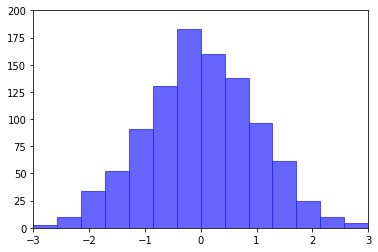

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
import os

n = 1000000
p = 0.5
m = 1000

uniform_sample = np.random.uniform(0., 1., (m,n))
coin = np.zeros_like(uniform_sample)
coin[uniform_sample > 1-p] = 1.
running_average = np.cumsum(coin, axis=1) / np.arange(1,n+1)
sample_mean = np.mean(running_average, axis=0).reshape((1,n))
sample_std = np.std(running_average, axis=0).reshape((1,n))
running_average = (running_average - sample_mean) / sample_std  

if not os.path.exists('./mp4'):
    os.mkdir('./mp4')
    
n, bins = 0, np.linspace(-3.,3.,15)
left = bins[:-1]
right = bins[1:]
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left # 왼쪽 바텀 x좌표 정보
verts[0::5, 1] = bottom # 왼쪽 바텀 y좌표 정보
verts[1::5, 0] = left # 왼쪽 탑 x좌표 정보
verts[1::5, 1] = top # 왼쪽 탑 y좌표 정보
verts[2::5, 0] = right # 오른쪽 탑 x좌표 정보
verts[2::5, 1] = top # 오른쪽 탑 y좌표 정보
verts[3::5, 0] = right # 오른쪽 바텀 x좌표 정보
verts[3::5, 1] = bottom # 오른쪽 바텀 y좌표 정보

patch = None
def animate(i):
    data = running_average[:,i*100]
    n, _ = np.histogram(data, bins=bins)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

fig, ax = plt.subplots()
ax = plt.axes(xlim=(-3., 3.), ylim=(0, 200))
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='blue', edgecolor='blue', alpha=0.6)
ax.add_patch(patch)

ani = animation.FuncAnimation(fig, animate, 10000, repeat=False, blit=True)
ani.save('./mp4/coin_flip_clt.mp4')
plt.show()